# 집값 예측 경진대회

## 패키지 import 및 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Jaesu/github_desktop/Dacon-Basic/집값-예측/Data/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1350 non-null   int64 
 1   Overall Qual    1350 non-null   int64 
 2   Gr Liv Area     1350 non-null   int64 
 3   Exter Qual      1350 non-null   object
 4   Garage Cars     1350 non-null   int64 
 5   Garage Area     1350 non-null   int64 
 6   Kitchen Qual    1350 non-null   object
 7   Total Bsmt SF   1350 non-null   int64 
 8   1st Flr SF      1350 non-null   int64 
 9   Bsmt Qual       1350 non-null   object
 10  Full Bath       1350 non-null   int64 
 11  Year Built      1350 non-null   int64 
 12  Year Remod/Add  1350 non-null   int64 
 13  Garage Yr Blt   1350 non-null   int64 
 14  target          1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


In [4]:
df.isnull().values.any()

False

`-` 행은 1350개, 열은 15개이며 결측치는 없다

|컬럼명 |세부사항 |
|:-:|:-:|
|id | 데이터 고유 id|
|Overall Qual | 전반적 재료와 마감 품질|
|Year Built | 완공 연도|
|Year Remod/Add | 리모델링 연도|
|Exter Qual | 외관 재료 품질|
|Bsmt Qual |지하실 높이|
|Total Bsmt SF| 지하실 면적| 
|1st Flr SF | 1층 면적 |
|Gr Liv Area | 지상층 생활 면적|
|Full Bath | 지상층 화장실 개수| 
|Kitchen Qual | 부엌 품질 |
|Garage Yr Blt | 차고 완공 연도|
|Garage Cars| 차고 자리 개수|
|Garage Area| 차고 면적 |
|target | 집값(달러 단위)|

In [5]:
df.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [6]:
df.describe()

,id,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,675.500000,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,389.855743,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,1.000000,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,338.250000,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,675.500000,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,1012.750000,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,1350.000000,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


`-` OverallQual은 높을수록 좋은건지 낮을수록 좋은건지는 아직 모르겠다

`-` 집값은 수치가 깔금하다(대부분 $0$으로 끝남) 

`-` 양적 변수는 지하실 면적, 1층 면적, 지상층 생활 면적, 차고 면적, 집값이고 그 외는 범주형 변수이다

## 데이터 EDA

### 양적 변수

#### 상관관계

`-` 상관관계를 확인하기에 앞서 범주형 변수를 라벨인코딩을 통해 숫자로 바꿔주자

In [7]:
df.drop('id', axis = 1, inplace = True) ## id는 필요없으니 제거

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
## 라벨 인코딩
for col in df.columns[df.dtypes == 'object']:
    label = LabelEncoder()
    df[col + '_'] = label.fit_transform(df[col])

<AxesSubplot:>

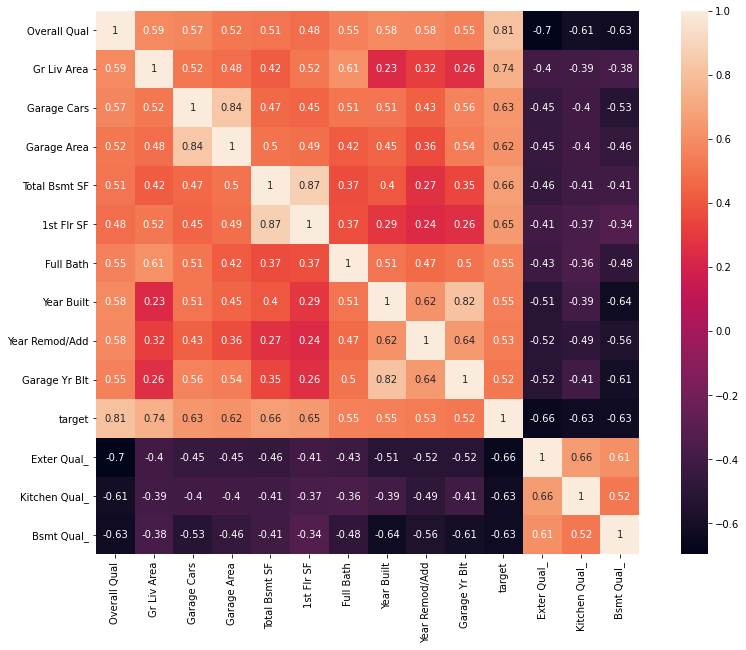

In [10]:
plt.figure(figsize = (15, 10))
corr_matrix = df.corr(method = 'pearson') # 상관관계 행렬
sns.heatmap(corr_matrix, annot = True, square = True)

`-` 히트맵을 보면 전체적으로 상관계수가 높게 나온다(다중공선성을 조심해야 함)

`-` Overall Qual은 높을수록 좋다

#### 집값

`-` 집값의 분포를 확인하자

In [10]:
sns.set_theme()
sns.set(rc = {'figure.figsize':(10, 6)})

<AxesSubplot:xlabel='target', ylabel='Count'>

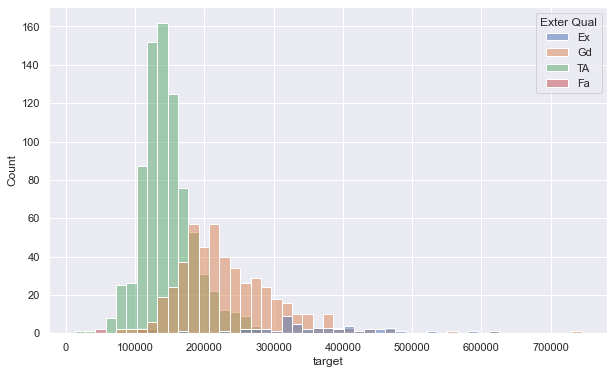

In [22]:
sns.histplot(x = 'target', data = df, hue = 'Exter Qual') 

`-` 오른쪽으로 꼬리가 긴 분포이다

`-` 추후 모델링을 할 땐 로그 변환을 통해 정규화를 시켜줄 필요가 있어보인다

<AxesSubplot:xlabel='Exter Qual', ylabel='target'>

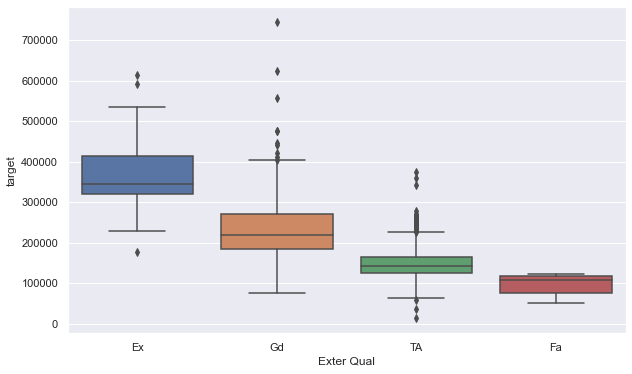

In [210]:
sns.boxplot(y = 'target', x = 'Exter Qual', data = df)

<AxesSubplot:xlabel='Bsmt Qual', ylabel='target'>

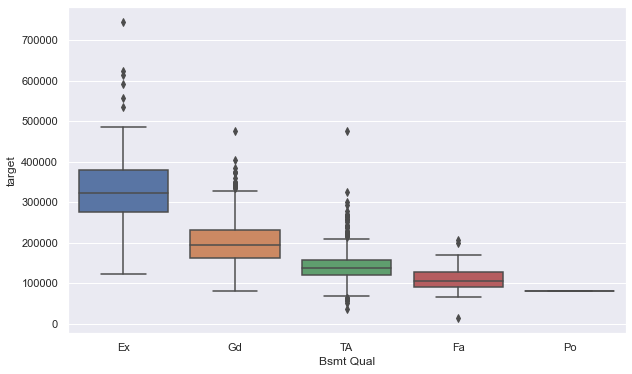

In [212]:
sns.boxplot(y = 'target', x = 'Bsmt Qual', order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], data = df)

<AxesSubplot:xlabel='Kitchen Qual', ylabel='target'>

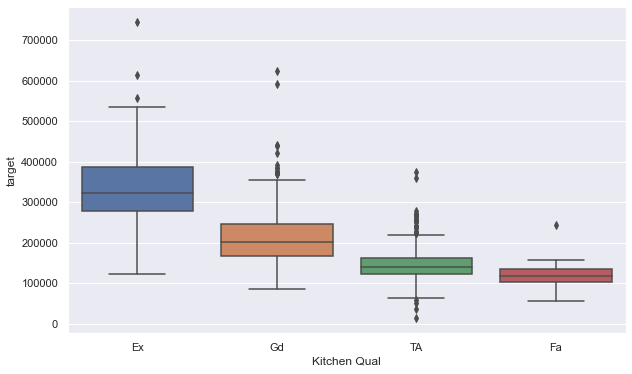

In [207]:
sns.boxplot(y = 'target', x = 'Kitchen Qual', data = df)

<AxesSubplot:xlabel='Overall Qual', ylabel='target'>

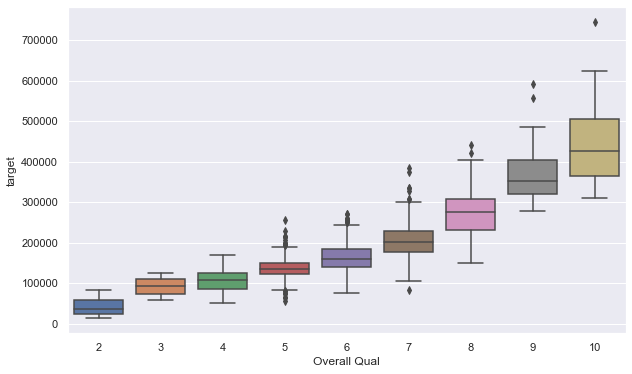

In [147]:
sns.boxplot(y = 'target', x = 'Overall Qual', data = df)

#### 지상층 생활 면적

<AxesSubplot:xlabel='Gr Liv Area', ylabel='Count'>

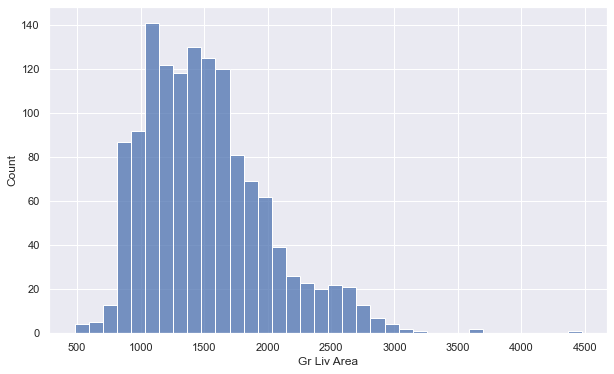

In [38]:
sns.histplot(x = 'Gr Liv Area', data = df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='Count'>

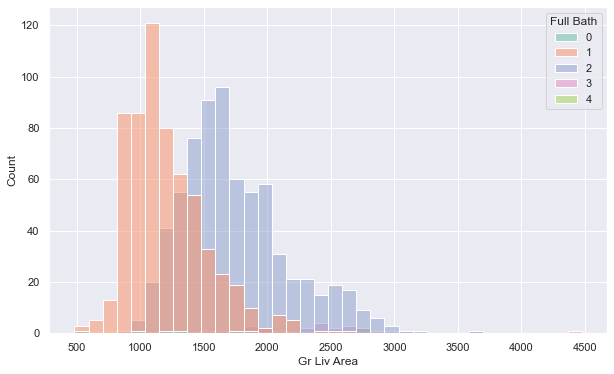

In [47]:
sns.histplot(x = 'Gr Liv Area', data = df, hue = 'Full Bath', palette = sns.color_palette('Set2', 5))

`-` 지상층 화장실 개수는 대부분 1개 아니면 2개이다

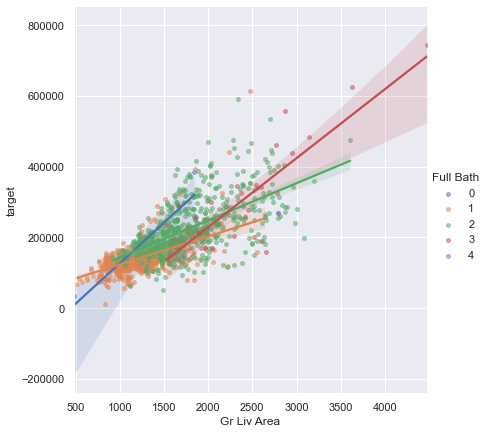

In [122]:
sns.lmplot(x = 'Gr Liv Area', y = 'target', hue = 'Full Bath', scatter_kws = {'alpha':0.5, 's':15}, height = 6, data = df)

#### 지하실 면적

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='Count'>

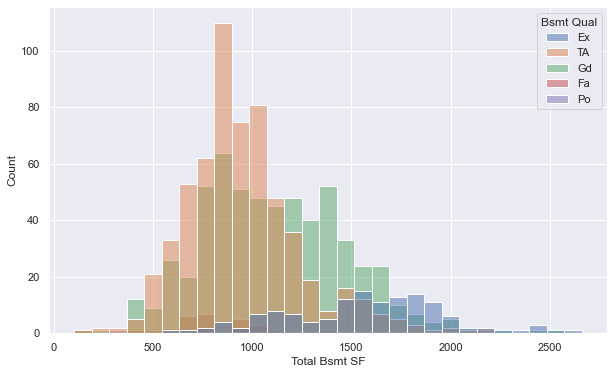

In [24]:
sns.histplot(x = 'Total Bsmt SF', hue = 'Bsmt Qual', data = df)

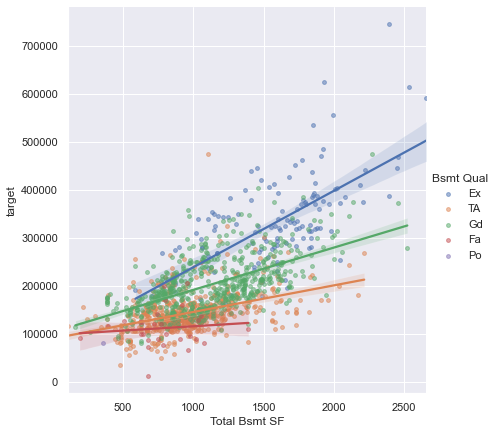

In [123]:
sns.lmplot(x = 'Total Bsmt SF', y = 'target', hue = 'Bsmt Qual', scatter_kws = {'alpha':0.5, 's':15}, height = 6, data = df)

`-` Bsmt Qual(지하실 높이)에 따라 집값간의 기울기가 다르다

#### 차고 면적

<AxesSubplot:xlabel='Garage Area', ylabel='Count'>

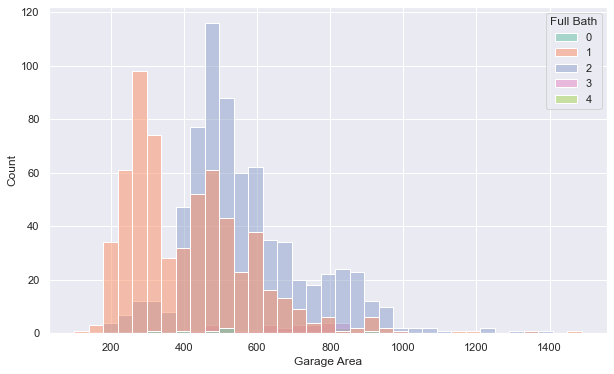

In [200]:
sns.histplot(x = 'Garage Area', data = df, hue = 'Full Bath', palette = sns.color_palette('Set2', 5))

<AxesSubplot:xlabel='Garage Area', ylabel='Count'>

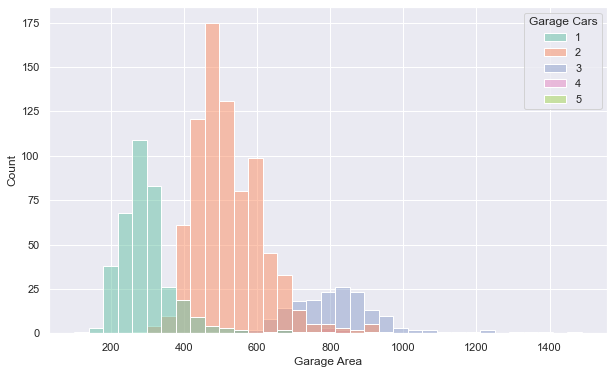

In [32]:
sns.histplot(x = 'Garage Area', data = df, hue = 'Garage Cars', palette = sns.color_palette('Set2', 5))

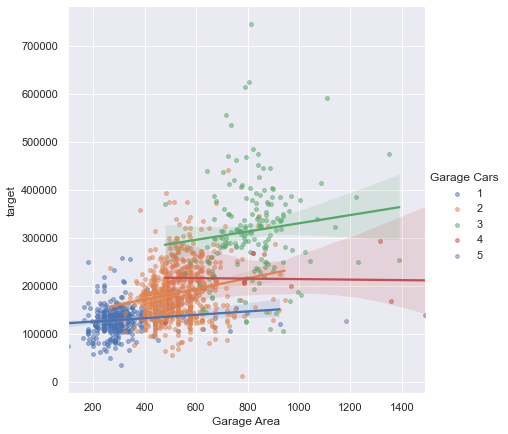

In [124]:
sns.lmplot(x = 'Garage Area', y = 'target', hue = 'Garage Cars', scatter_kws = {'alpha':0.5, 's':15}, height = 6, data = df)

#### 1층 면적

<AxesSubplot:xlabel='1st Flr SF', ylabel='Count'>

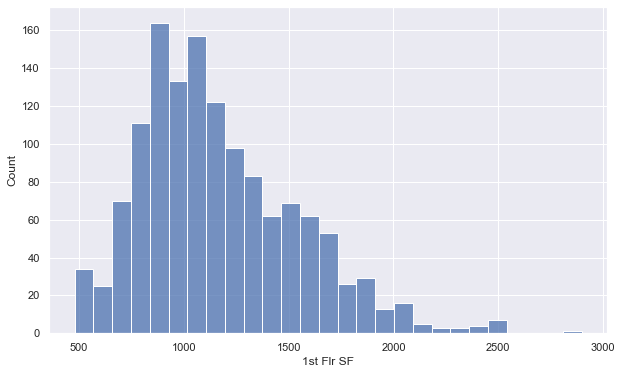

In [30]:
sns.histplot(x = '1st Flr SF', data = df)

#### 완공, 리모델링 연도

`-` 양적 변수인지 범주형 변수인지 애매함

<AxesSubplot:xlabel='Year Built', ylabel='Year Remod/Add'>

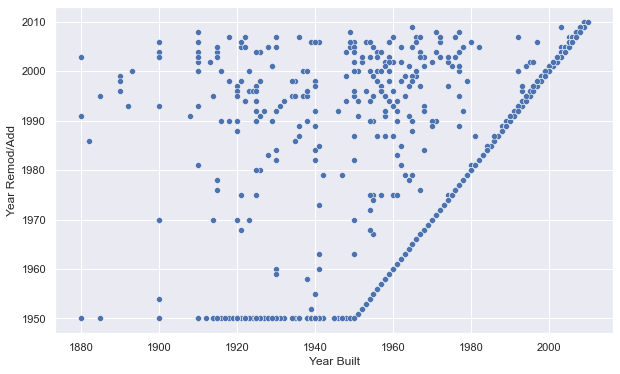

In [52]:
sns.scatterplot(x = 'Year Built', y = 'Year Remod/Add', data = df)

`-` 보면 알겠지만 완공 연도 < 리모델링 연도이다(완공하기 전에 리모델링을 할 순 없으니 당연하다)

`-` `리모델링 연도 - 완공 연도` 라는 새로운 파생변수를 만들자

In [60]:
df['gap_Built_RemodAdd'] = df['Year Remod/Add'] - df['Year Built']

`-` 완공하고 몇년뒤에 리모델링을 했는지 시각화하자

<AxesSubplot:xlabel='Year Built', ylabel='gap_Built_RemodAdd'>

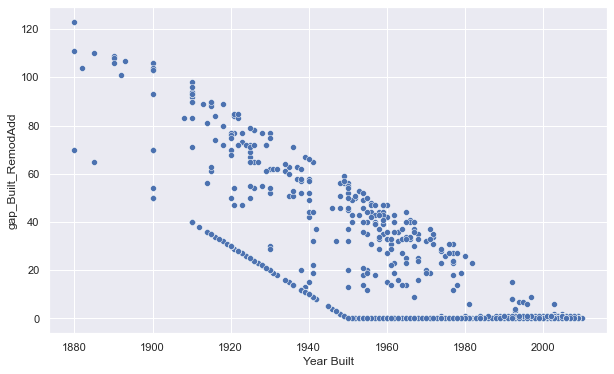

In [64]:
sns.scatterplot(x = 'Year Built', y = 'gap_Built_RemodAdd', data = df)

`-` 오래전에 지어진 건물일수록 건물을 짓고 한참 뒤에 리모델링을 한다

`-` 완공 연도와 리모델링 연도가 같은 건물들이 있다

`-` 어떤 건물인지 궁금하다

<AxesSubplot:xlabel='target', ylabel='Count'>

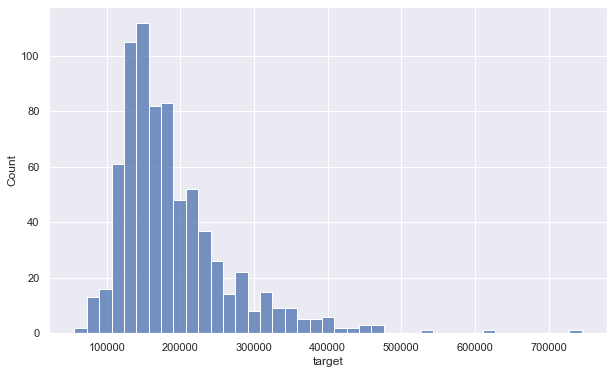

In [65]:
sns.histplot(data = df.query('gap_Built_RemodAdd == 0'), x = 'target')

`-` 완공 연도에 리모델링을 한다고 집값에서 차이가 있진 않다

`-` 그렇다면 최근에 리모델링을 한 건물의 집값이 더 비싼지 궁금하다

<AxesSubplot:xlabel='target', ylabel='Count'>

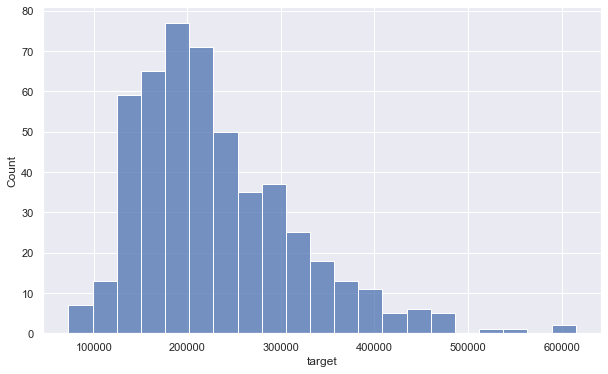

In [78]:
sns.histplot(data = df[df.loc[:,'Year Remod/Add'] >= 2000], x = 'target')

`-` 별 차이가 없다

#### box plot

`-` 전체적으로 박스플랏을 그려보자

In [83]:
numeric_feature = df.columns[(df.dtypes == np.int64) | (df.dtypes == float)]
categorical_feature = df.columns[df.dtypes == 'O']

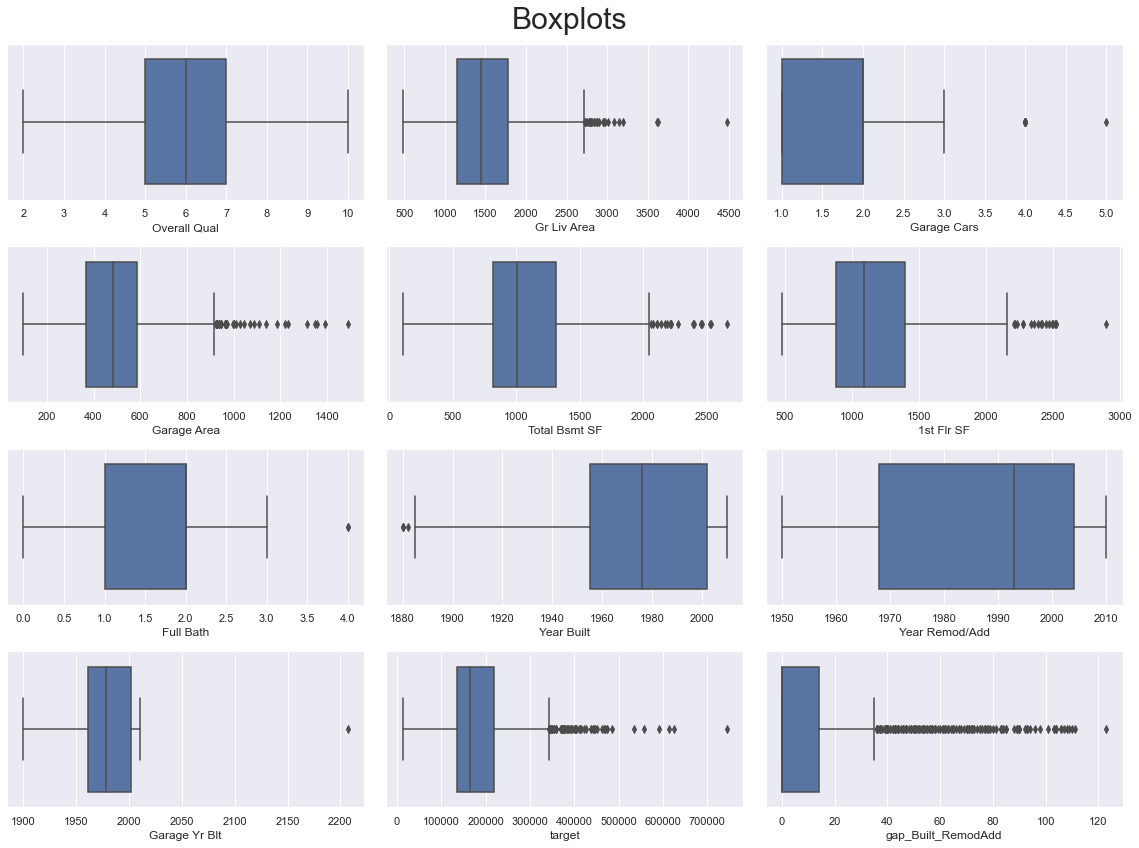

In [93]:
## Boxplot 사용

plt.figure(figsize = (16, 12))
plt.suptitle('Boxplots', fontsize = 30)

for i in range(len(numeric_feature)):
    plt.subplot(4, 3, i+1) ## 수치형 데이터가 12개
    sns.boxplot(x = numeric_feature[i], data = df)
    
plt.tight_layout()

`-` 이상점이 많은 피쳐는 오른쪽으로 꼬리가 긴 분포인데 이는 로그 변환을 통해 정규분포로 바꿔줄 수 있다

#### pair plot

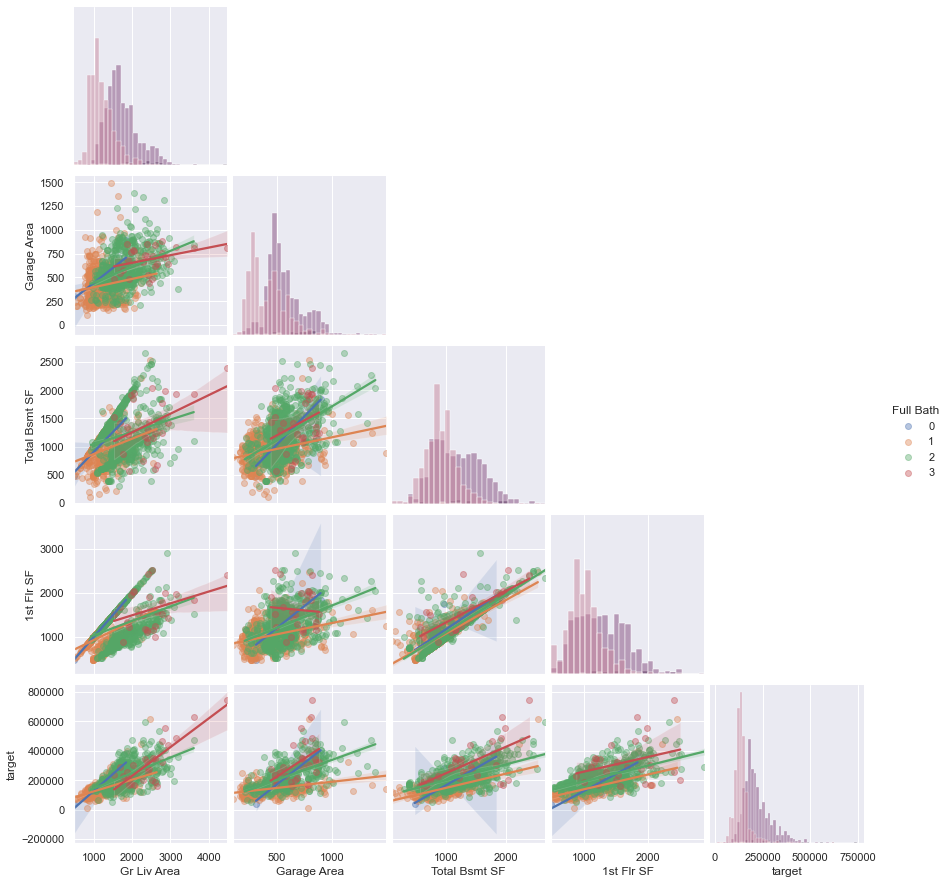

In [203]:
sns.pairplot(df[df.loc[:, 'Full Bath'] <= 3], kind = 'reg', vars = ['Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'target'], 
             diag_kind = 'hist', hue = 'Full Bath', corner = True, plot_kws = {'scatter_kws': {'alpha': 0.4}})

`-` 컬러가 맘에 안든다

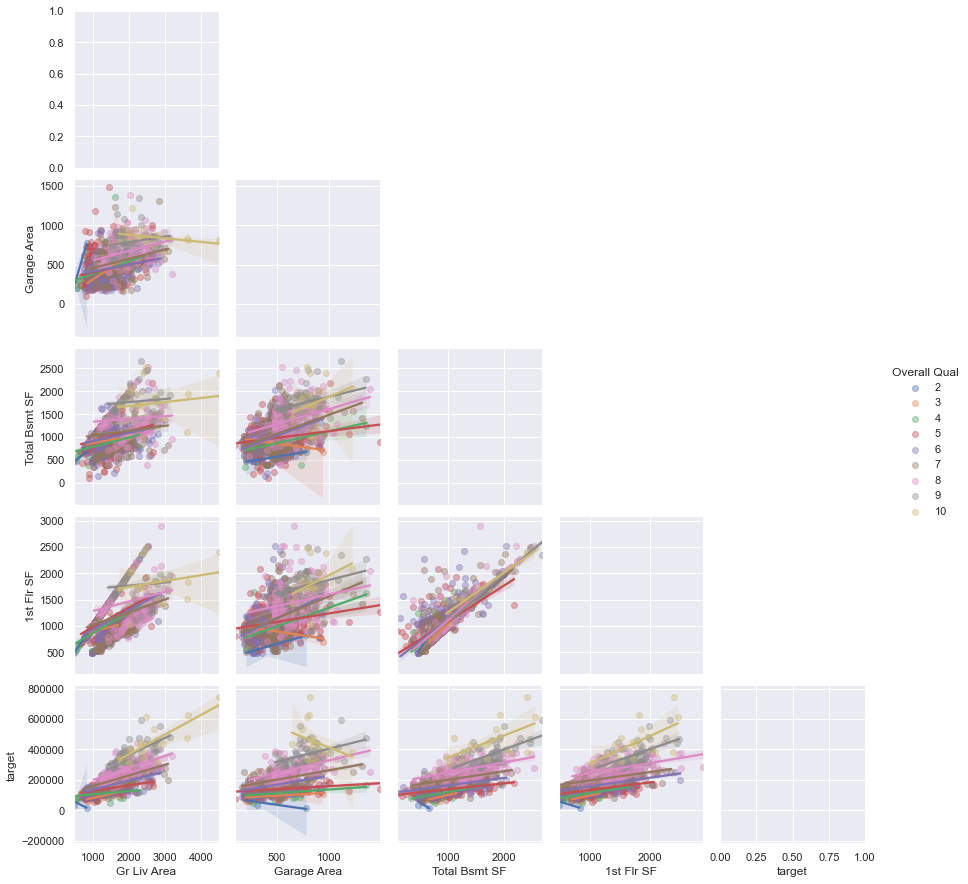

In [205]:
sns.pairplot(df[df.loc[:, 'Full Bath'] <= 3], kind = 'reg', vars = ['Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'target'], 
             diag_kind = 'None', hue = 'Overall Qual', corner = True, plot_kws = {'scatter_kws': {'alpha': 0.4}})

`-` 그림이 개떡같이 생기긴 했는데 target이 포함된 산점도를 보면 기울기의 큰 차이가 있진 않다

`-` 특별한 거라곤 Overall Qual이 2인 경우 기울기가 음수이고

`-` Garage Area의 경우 Overall Qual이 10인데 기울기가 음수이다

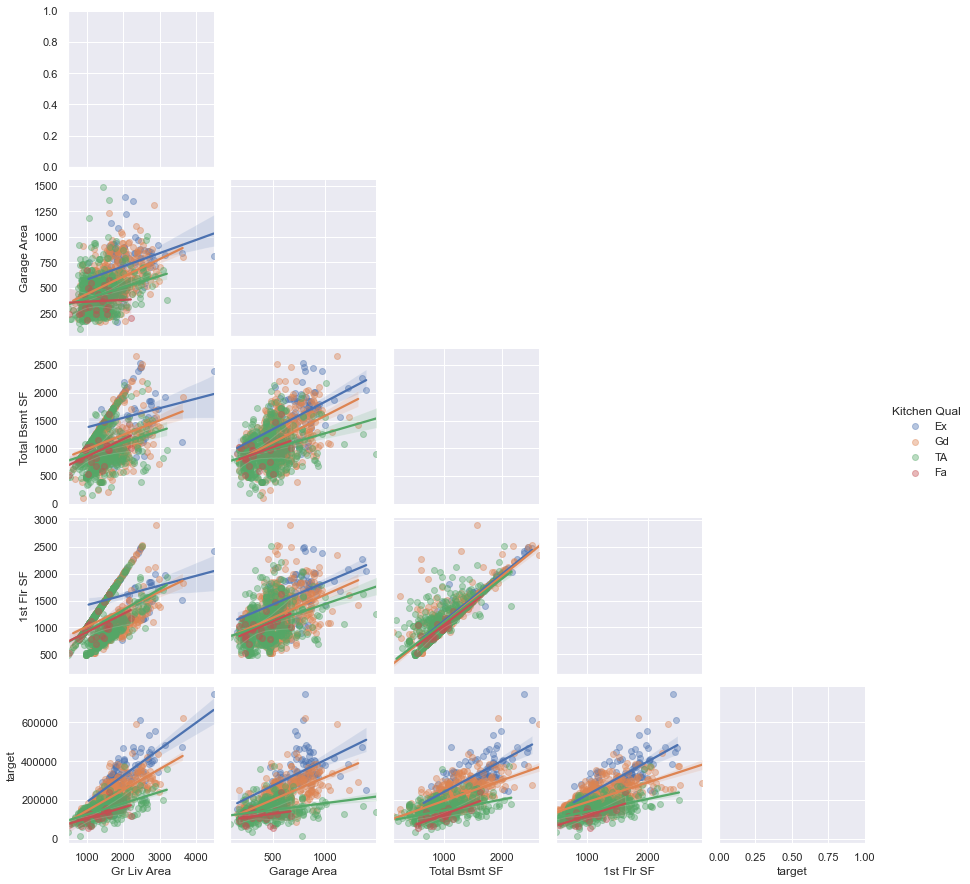

In [36]:
sns.pairplot(df[df.loc[:, 'Full Bath'] <= 3], kind = 'reg', vars = ['Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'target'], 
             diag_kind = 'None', hue = 'Kitchen Qual', corner = True, plot_kws = {'scatter_kws': {'alpha': 0.4}})

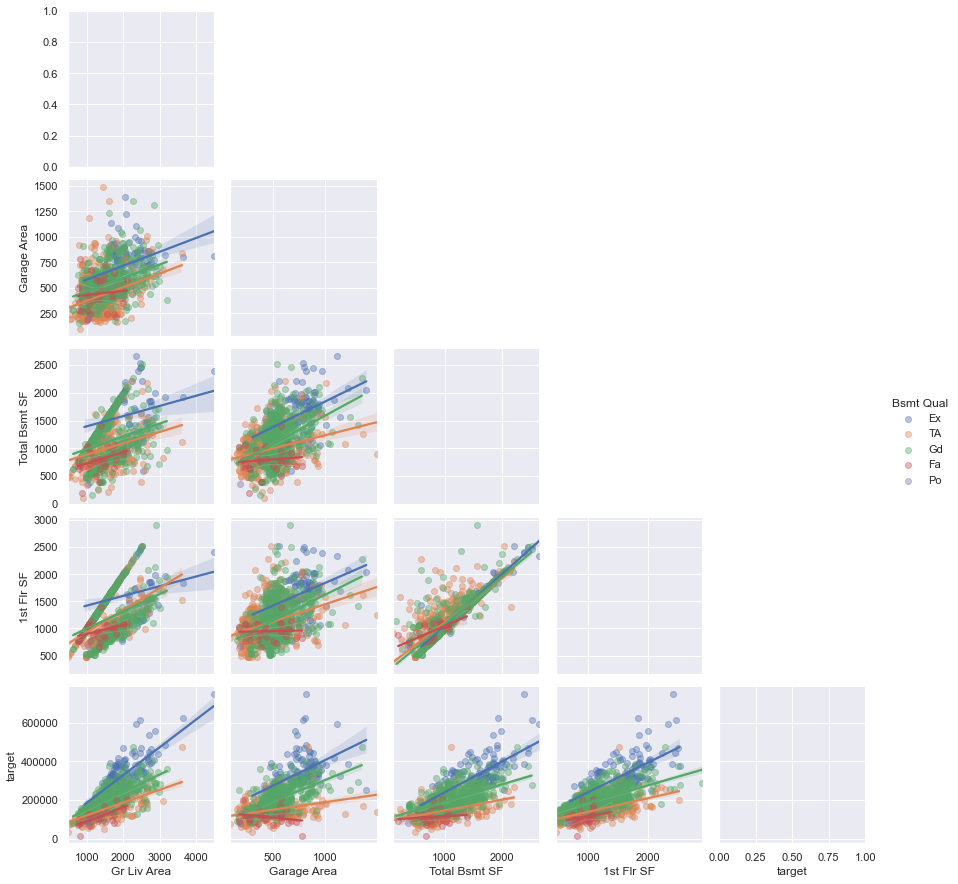

In [37]:
sns.pairplot(df[df.loc[:, 'Full Bath'] <= 3], kind = 'reg', vars = ['Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'target'], 
             diag_kind = 'None', hue = 'Bsmt Qual', corner = True, plot_kws = {'scatter_kws': {'alpha': 0.4}})

## 범주형 변수

### 막대 빈도

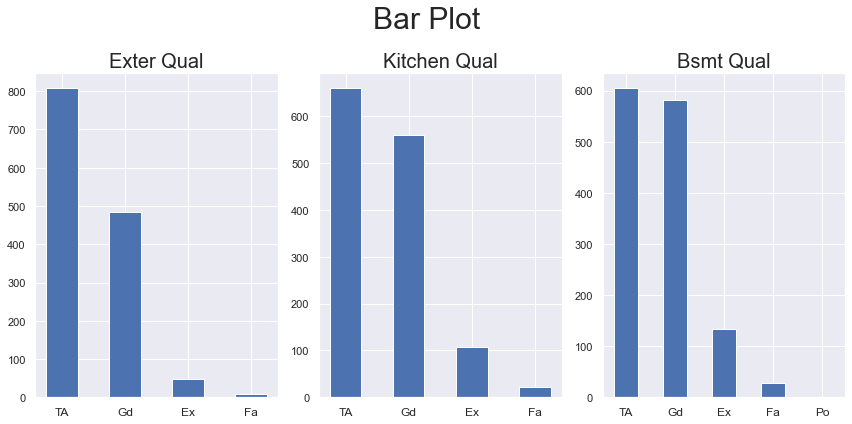

In [100]:
## 히스토그램을 사용

plt.figure(figsize = (12, 6))
plt.suptitle('Bar Plot', fontsize = 30)

for i in range(len(categorical_feature)):
    plt.subplot(1, 3, i+1) ## 범주형 변수는 3개
    plt.title(categorical_feature[i], fontsize = 20)
    temp = df[categorical_feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width = 0.5, color = 'b')
    plt.xticks(temp.keys(), fontsize = 12)
    
plt.tight_layout()

`-` 특정값에 몰려있다(TA, Gd)

`-` 퀄리티가 좋은 순서는 Ex(Excellent) >  Gd(Good) > TA(Average/Typical) > Fa(Fair) > Po(Poor) 이다

### target과 카테고리형 feature의 관계

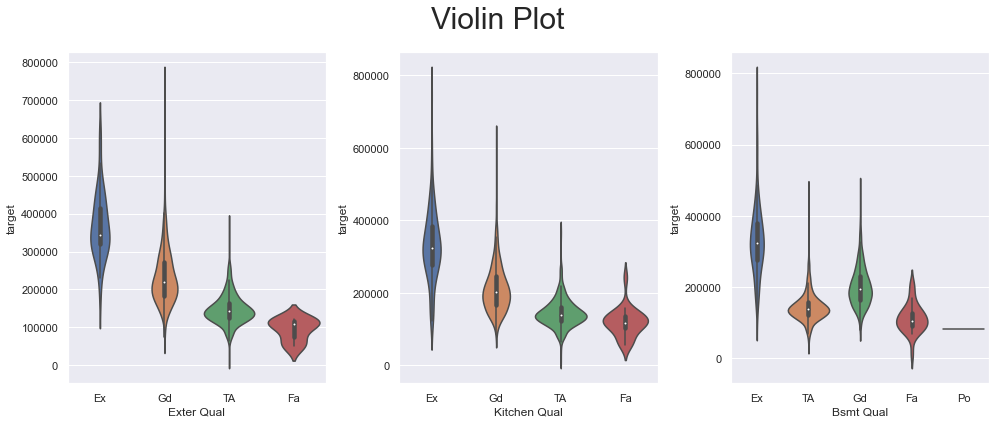

In [132]:
plt.figure(figsize = (14, 6))
plt.suptitle('Violin Plot', fontsize = 30)

for i in range(len(categorical_feature)):
    plt.subplot(1, 3, i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel('target')
    sns.violinplot(x = categorical_feature[i], y = df['target'], data = df)
    
plt.tight_layout()